Saving archive (3).zip to archive (3) (10).zip

 First 5 rows of the dataset 
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7 

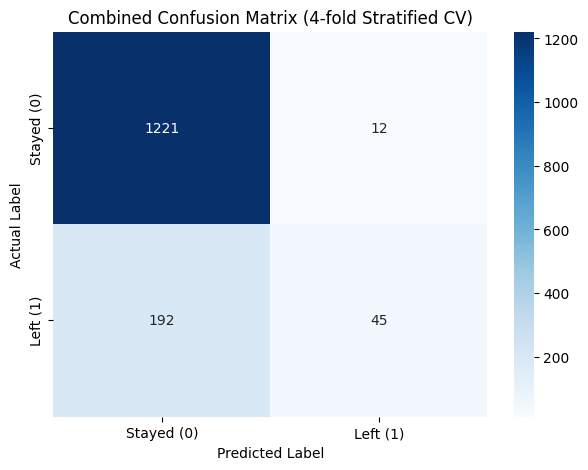

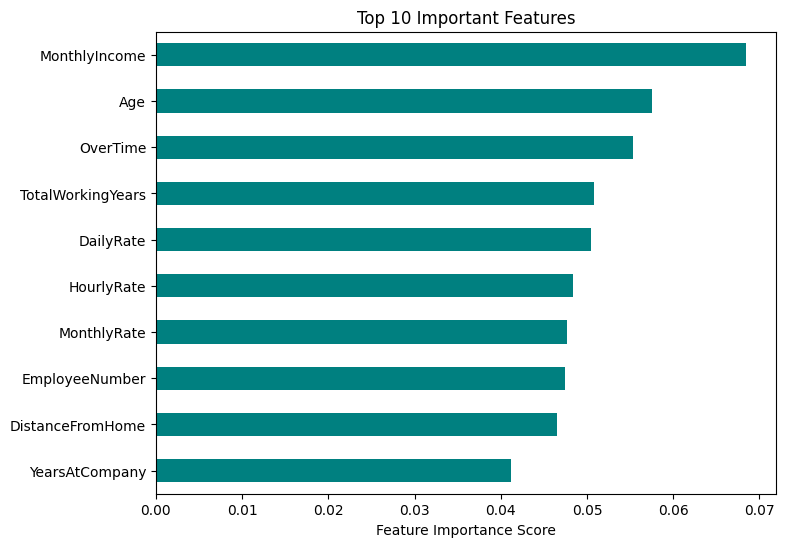

In [13]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Load data
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Better display of dataset info
print("\n" + "="*50)
print(" First 5 rows of the dataset ")
print("="*50)
print(df.head())

print("\n" + "="*50)
print(" Dataset Info ")
print("="*50)
print(df.info())

print("\n" + "="*50)
print(" Summary Statistics (Numerical Columns) ")
print("="*50)
print(df.describe())

print("\n" + "="*50)
print(" Missing Values Per Column ")
print("="*50)
print(df.isnull().sum())

# Convert target variable 'Attrition' to 0 (No) and 1 (Yes)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encode categorical variables once
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Initialize Stratified K-Fold with 4 splits
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# To store true and predicted labels for all folds
all_y_test = []
all_y_pred = []

print("\nStarting Stratified 4-Fold Cross Validation...\n")

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"--- Fold {fold} ---")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

print("\n" + "="*50)
print(" Combined Classification Report (All 4 folds) ")
print("="*50)
print(classification_report(all_y_test, all_y_pred))

cm = confusion_matrix(all_y_test, all_y_pred)
print("\n" + "="*50)
print(" Combined Confusion Matrix (All 4 folds) ")
print("="*50)
print(cm)

# Plot combined confusion matrix heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed (0)', 'Left (1)'],
            yticklabels=['Stayed (0)', 'Left (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Combined Confusion Matrix (4-fold Stratified CV)')
plt.show()

# Train final model on full dataset
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X, y)

# Plot feature importance
feat_importances = pd.Series(final_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()
